In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

# WordCloud and matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

from autocorrect import Speller
import nltk
import seaborn as sns
sns.set(style="darkgrid")
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # For stemming
nltk.download('punkt')

#from textblob import TextBlob
from langdetect import detect
from nltk.tokenize import word_tokenize
nltk.download('words')

from nltk.stem import WordNetLemmatizer 
english_vocab = set(w.lower() for w in nltk.corpus.words.words())


[nltk_data] Downloading package stopwords to /home/irina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/irina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /home/irina/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print('Training data shape: ', train_df.shape)
print('Testing data shape: ', test_df.shape)


#remove duplicates from train data
train_df = train_df.drop_duplicates().reset_index(drop=True)


Training data shape:  (7613, 5)
Testing data shape:  (3263, 4)


In [3]:
#Missing values in training set
train_df.isnull().sum()


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [4]:
#Missing values in test set
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [5]:
#select related columns
keywords = train_df['keyword']
cols = ['keyword','text', 'target']
train_df = train_df[cols]
cols_test = ['id','keyword','text']
test_df = test_df[cols_test]
#print(train_df)

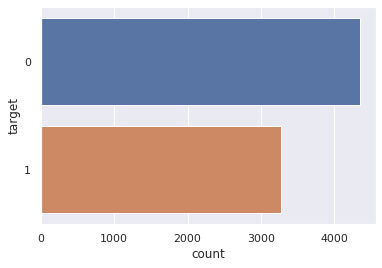

In [10]:
# Class balance
train_df.target.value_counts()
sns.countplot(y=train_df.target);
#sns.catplot(x=train_df., kind="count", palette="ch:.25", data=train_df);

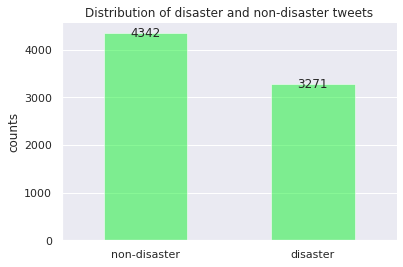

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
train_df['target'].value_counts().plot(kind = 'bar', color = '#12f12f', alpha = 0.5, grid = True)
plt.ylabel('counts')
plt.title('Distribution of disaster and non-disaster tweets')
bars = ('non-disaster', 'disaster')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, rotation = 'horizontal')
ax.xaxis.grid(which = "major")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals = 2), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center')


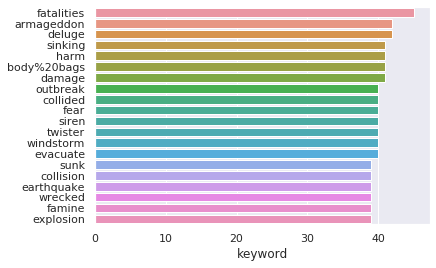

In [23]:

#Exploring the 'keyword' column

sns.barplot(y=train_df['keyword'].value_counts()[:20].index,x=train_df['keyword'].value_counts()[:20],
            orient='h')

# Preprocessing tweets text

In [ ]:
tweet_text = train_df["text"]
sw = stopwords.words("english")
spell = Speller(lang='en')

#from textblob import TextBlob
#from langdetect import detect

ps = PorterStemmer()  
lemmatizer = WordNetLemmatizer()

# Word Stemming
corpus = []
for i in tweet_text:
    processed_text = re.sub(r"http\S+", "", str(i))  #remove links
    processed_text = re.sub('[^a-zA-Z]', ' ', processed_text)
    processed_text = re.sub(r'\n',' ', processed_text)  #remove line breaks
    processed_text = re.sub('\s+', ' ', processed_text).strip() #Remove leading, trailing, and extra spaces
    processed_text = processed_text.lower() # to lower case
    processed_text = processed_text.split() # split words
    
    processed_text = ' '.join(processed_text) 
    newtext = ' '
    tokens = word_tokenize(processed_text)
    for w in tokens:
        w = spell(w)
        if not w in set(sw):
            newtext = newtext+' '+ ps.stem(w)
    corpus.append(newtext)
        
tweet_text = corpus
print(tweet_text)


train_df["text"] = tweet_text

# Preprocessing test text

In [3]:
tweet_text = test_df["text"]
sw = stopwords.words("english")
spell = Speller(lang='en')
ps = PorterStemmer()  
lemmatizer = WordNetLemmatizer()

# Word Stemming
corpus = []
for i in tweet_text:
    processed_text = re.sub(r"http\S+", "", str(i))  #remove links
    processed_text = re.sub('[^a-zA-Z]', ' ', processed_text)
    processed_text = re.sub(r'\n',' ', processed_text)  #remove line breaks
    processed_text = re.sub('\s+', ' ', processed_text).strip() #Remove leading, trailing, and extra spaces
    processed_text = processed_text.lower() # to lower case
    processed_text = processed_text.split() # split words
    
    processed_text = ' '.join(processed_text) 
    newtext = ' '
    tokens = word_tokenize(processed_text)
    for w in tokens:
        w = spell(w)
        if not w in set(sw):
            newtext = newtext+' '+ ps.stem(w)
    corpus.append(newtext)
        
tweet_text = corpus
print(tweet_text)


test_df["text"] = tweet_text

['  happen terribl car crash', '  heard earthquak differ citi stay safe everyon', '  forest fire spot pond gees flee across street save', '  apocalyps light spokan wildfir', '  typhoon soudelor kill china taiwan', '  shake earthquak', '  probabl still show life arsen yesterday eh eh', '  hey', '  nice hat', '  fuck', '  like cold', '  nooooooooo', '  tell', ' ', '  awesom', '  birmingham wholesal market ablaz bc news fire break birmingham wholesal market', '  sunkxssedharri wear short race ablaz', '  previouslyondoyintv toke make marriag crisi set nigerian twitter ablaz', '  check', '  pa split person techi follow ablaz co burner follow ablaz', '  bewar world ablaz sierra leon amp gap', '  burn man ablaz turban diva via easi', '  diss song peopl take thing run sm eye open though set game ablaz cyhitheprync', '  rape victim die set ablaz year old girl die burn injuri set ablaz', '  set ablaz', '  ctvtoronto bin front field hous wer set ablaz day flame went rite hydro pole wonder', '  no

# Dealing with missing keywords

In [24]:
# preprocessing uniqueKeywords
#make set of unique keywords
uniqueKeywords = set()       
keywords = set(keywords)
print(len(keywords))

# uniqueKeywords is without nan values
for word in keywords:
    if not pd.isna(word):
        uniqueKeywords.add(word)

corpus = set()
for k in uniqueKeywords:
    processed_text = re.sub('[^a-zA-Z]', ' ', str(k))
    processed_text = processed_text.lower() # to lower case
    processed_text = processed_text.split() # split words
    processed_text = ' '.join(processed_text)
    
    newtext = ''
    
    tokens = word_tokenize(processed_text)
    for w in tokens:
        #w = spell(w)
        if not w in set(sw):
            if(len(tokens) == 1):
                newtext = ps.stem(w)
            else:
                if (newtext == ''):
                    newtext = ps.stem(w)
                else:
                    newtext = newtext+' '+ ps.stem(w)
    corpus.add(newtext)
      
uniqueKeywords = corpus  
#print(uniqueKeywords)


222


# Replacing missing keywords in train set

In [ ]:
#retrieving tweets with missing keywords and replacing them with dictionary keywords
for i in range(len(train_df)):
    if pd.isna(train_df.keyword[i]):
        isFound = False
        for word in uniqueKeywords:
            if word in train_df.text[i]:
                train_df.keyword[i] = word
                isFound = True
                break
        #no related keyword was found, inserting artificial keyword
        if not isFound:
            train_df.keyword[i] = "other"
        print(train_df.keyword[i])
        print(train_df.text[i])
       

# Replacing missing keywords in test set

In [5]:
#retrieving tweets with missing keywords and replacing them with dictionary keywords
for i in range(len(test_df)):
    if pd.isna(test_df.keyword[i]):
        isFound = False
        for word in uniqueKeywords:
            if word in test_df.text[i]:
                test_df.keyword[i] = word
                isFound = True
                break
        #no related keyword was found, inserting artificial keyword
        if not isFound:
            test_df.keyword[i] = "other"
        print(test_df.keyword[i])
        print(test_df.text[i])
       

crash
  happen terribl car crash
earthquak
  heard earthquak differ citi stay safe everyon
fire
  forest fire spot pond gees flee across street save
apocalyps
  apocalyps light spokan wildfir
typhoon
  typhoon soudelor kill china taiwan
earthquak
  shake earthquak
other
  probabl still show life arsen yesterday eh eh
other
  hey
other
  nice hat
other
  fuck
other
  like cold
other
  nooooooooo
other
  tell
other
 
other
  awesom
quarantin
  bola ebolaoutbreak bola viru birmingham ala firefight quarantin possibl exposur offici say
debri
  malaysian pm confirm debri miss flight mh
quarantin
  offici alabama home quarantin possibl bola case washington time
suicid bomb
  see yr old pik suicid bomber deton bomb turkey armi trench releas harn dear
derail
  confer attende blue line airport derail pleas look take taxi hotel see soon
death
  death toll suicid car bomb pg posit villag jajman eastern provinc halaka risen
earthquak
  earthquak safeti lo angel safeti fasten
hurrican
  storm ri wor

<ipython-input-5-5141f3ef0004>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.keyword[i] = word
<ipython-input-5-5141f3ef0004>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.keyword[i] = "other"


# Saving train and test set

In [ ]:
train_df.to_csv("preprocessed_train_data.csv")

In [6]:
test_df.to_csv("preprocessed_test_data.csv")